# Project 4-Predictive Analysis using scikit-learn

### Group Members:
Yifeng Lin

Yuan Zheng

### Purpose
Build a logistic regression based on some attributes of mushrooms to predict whether a mushroom is poisonous or not.

### For the Phase I: Data Acquisition, Data Preparation & Exploratory Data Analysis:
We have loaded the data about mushrooms and then create a Dataframe with a subset of the columns. After some basic cleaning about our dataset, we are going to show the EDA by using seaborn, which enables us to use histograms to show the distribution of our data.
### For the Phase II:Build Predictive Models
After converting indicators into digits, we plan to evaluate the model by splitting it into train and test sets and get the score for each attribute.

### Data dictionary

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



The link of references:
- https://archive.ics.uci.edu/ml/datasets/mushroom

## Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

mr_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header = None)

In [2]:
# sanity check - make sure data was read in as expected
mr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Preparation


In [3]:
# create a subset of 5 columns, including 'edible' + 'poisonous'
# use the 'copy()' function if you want to preserve the original data frame
mr_sub = mr_df.iloc[:, [0, 5, 3, 18]].copy()

In [4]:
# check results: do we have the 4 columns we want? Check the first 10 rows
mr_sub.head(10)

,0,5,3,18
0,p,p,n,o
1,e,a,y,o
2,e,l,w,o
3,p,p,w,o
4,e,n,g,o
5,e,a,y,o
6,e,a,w,o
7,e,l,w,o
8,p,p,w,o
9,e,a,y,o


In [5]:
# add meaningful column names
mr_sub.columns = ['Poisonous', 'Odor', 'Cap_Color', 'Ring_Number']

# sanity check
mr_sub.head(5)

,Poisonous,Odor,Cap_Color,Ring_Number
0,p,p,n,o
1,e,a,y,o
2,e,l,w,o
3,p,p,w,o
4,e,n,g,o


In [6]:
# replace Edible col values
mr_sub.Poisonous.replace('e', '0', inplace = True)
mr_sub.Poisonous.replace('p', '1', inplace = True)

In [7]:
mr_sub['Poisonous'] = mr_sub['Poisonous'].astype(int)

In [8]:
# merge the dummy variables with the original data: note that
# the original "key" column can optionally be removed as was done here
# but if you have sufficient memory to work with it is usually
# advisable to retain the original column for reference purposes.
# 
# Also note that a prefix of "key" is being appended to each of the 
# valid values taken from the "key" column for purposes of applying a 
# meaningful name to the dummy variable columns
o = pd.get_dummies(mr_sub['Odor'], prefix='Odor')
c = pd.get_dummies(mr_sub['Cap_Color'], prefix='Cap_Color')
r = pd.get_dummies(mr_sub['Ring_Number'], prefix='Ring_Number')
a = mr_sub[['Poisonous']].join(o)

In [9]:
b = a.join(c)

In [10]:
mr_with_dummy = b.join(r)
mr_with_dummy

,Poisonous,Odor_a,Odor_c,Odor_f,Odor_l,Odor_m,Odor_n,Odor_p,Odor_s,Odor_y,...,Cap_Color_g,Cap_Color_n,Cap_Color_p,Cap_Color_r,Cap_Color_u,Cap_Color_w,Cap_Color_y,Ring_Number_n,Ring_Number_o,Ring_Number_t
0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8120,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8121,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8122,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [11]:
# check the data for null values
mr_with_dummy.isnull().sum()

Poisonous        0
Odor_a           0
Odor_c           0
Odor_f           0
Odor_l           0
Odor_m           0
Odor_n           0
Odor_p           0
Odor_s           0
Odor_y           0
Cap_Color_b      0
Cap_Color_c      0
Cap_Color_e      0
Cap_Color_g      0
Cap_Color_n      0
Cap_Color_p      0
Cap_Color_r      0
Cap_Color_u      0
Cap_Color_w      0
Cap_Color_y      0
Ring_Number_n    0
Ring_Number_o    0
Ring_Number_t    0
dtype: int64

## Exploratory Data Analysis (EDA)

Summary statistics for each attribute and appropriate graphical analysis for each attributes using Seaborn.

### Data Summary
There are 4 attributes in mr_sub dataset:

1. Poisonous: p=poisonous,e=edible;

2. Odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s;

3. Cap_Color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y;

4. Ring_Number: none=n,one=o,two=t.

The specific type of each data is below:

In [12]:
print(mr_sub.dtypes)

Poisonous       int32
Odor           object
Cap_Color      object
Ring_Number    object
dtype: object


As we can see, the data types of "Poisonous" are int, the data types of others are the object.

### Preliminary Data Analysis - Poisonous

Now we gather descriptive statistics on "Poisonous" and create a histogram to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [13]:
# get descriptive stats for "Poisonous"
mr_sub['Poisonous'].describe()

count    8124.000000
mean        0.482029
std         0.499708
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Poisonous, dtype: float64

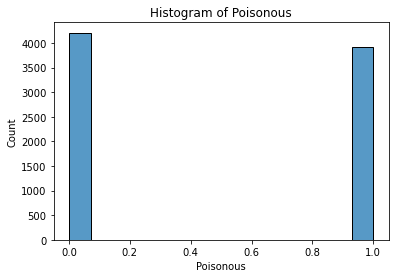

In [14]:
# define the type of plot you want to appear
sns.histplot(mr_sub['Poisonous'])
# give the plot a title
plt.title('Histogram of Poisonous')
# show the histogram
plt.show();

We can see from the descriptive statistics that the distribution of "Edible" is skewed right with a mean of 0.48, a minimum of 0, a max of 1, and a standard deviation of 0.50.

### Preliminary Data Analysis - Odor

Now we gather descriptive statistics on "Odor" and create a histogram to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [15]:
# get descriptive stats for "Odor"
mr_sub['Odor'].describe()

count     8124
unique       9
top          n
freq      3528
Name: Odor, dtype: object

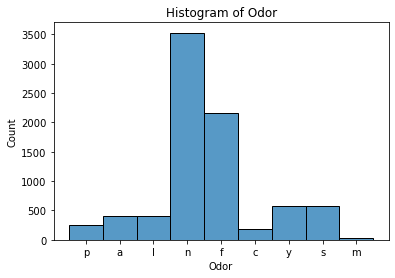

In [16]:
# define the type of plot you want to appear
sns.histplot(mr_sub['Odor'])
# give the plot a title
plt.title('Histogram of Odor')
# show the histogram
plt.show();

The distribution of the "Odor" attribute provides us with a count of each "Odor". From the descriptive statistics and the histogram, we can see that 'n' and 'f' are far more than other odors.

### Preliminary Data Analysis -  Cap_Color

Now we gather descriptive statistics on "Cap_Color" and create a histogram to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [17]:
# get descriptive stats for "Cap_Color"
mr_sub['Cap_Color'].describe()

count     8124
unique      10
top          n
freq      2284
Name: Cap_Color, dtype: object

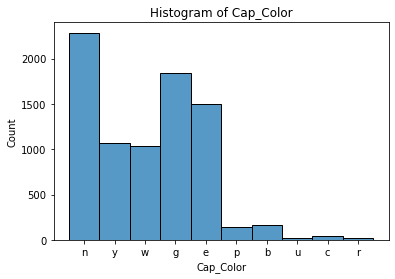

In [18]:
# define the type of plot you want to appear
sns.histplot(mr_sub['Cap_Color'])
# give the plot a title
plt.title('Histogram of Cap_Color')
# show the histogram
plt.show();

The distribution of the "Cap_Color" attribute provides us with a count of each "Cap_Color". From the descriptive statistics and the histogram, we can see that 'n' is far more than others, and 'u', 'c' , 'r' are far less than others.

### Preliminary Data Analysis -  Ring_Number

Now we gather descriptive statistics on "Ring_Number" and create a histogram to display these statistics in visualization so that we can quickly identify the shape of the distribution.

In [19]:
# get descriptive stats for "Ring_Number"
mr_sub['Ring_Number'].describe()

count     8124
unique       3
top          o
freq      7488
Name: Ring_Number, dtype: object

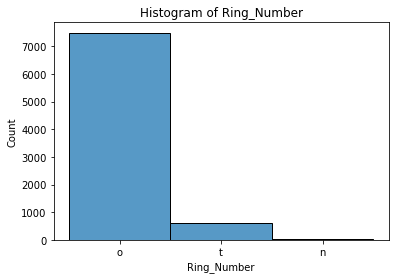

In [20]:
# define the type of plot you want to appear
sns.histplot(mr_sub['Ring_Number'])
# give the plot a title
plt.title('Histogram of Ring_Number')
# show the histogram
plt.show();

The distribution of the "Ring_Number" attribute provides us with a count of each "Ring_Number". From the descriptive statistics and the histogram, we can see that 'o' is far more than others, and 'n' is far less than others.

### Data Exploration

In [21]:
mr_sub.groupby('Poisonous').describe()

Odor                  Cap_Color                  Ring_Number  \
          count unique top  freq     count unique top  freq       count   
Poisonous                                                                 
0          4208      3   n  3408      4208     10   n  1264        4208   
1          3916      7   f  2160      3916      8   n  1020        3916   

                            
          unique top  freq  
Poisonous                   
0              2   o  3680  
1              3   o  3808

### Data Visualization

Text(0, 0.5, 'Frequency')

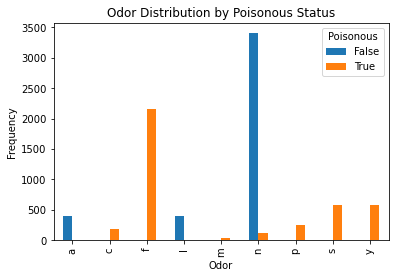

In [22]:
# barplot of "Odor" grouped by "Poisinous" (True or False)
pd.crosstab(mr_sub.Odor, mr_sub.Poisonous.astype(bool)).plot(kind='bar')
plt.title('Odor Distribution by Poisonous Status')
plt.xlabel('Odor')
plt.ylabel('Frequency')

From this side by side bar chart, we can see that most mushrooms are either poisonous or not, so whether mushrooms are poisonous or not is indeed related to different odors.

Text(0, 0.5, 'Percentage')

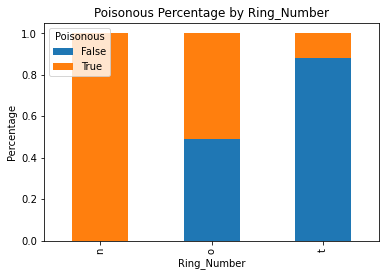

In [23]:
Poisonous_Ring_Number = pd.crosstab(mr_sub.Ring_Number, mr_sub.Poisonous.astype(bool))
Poisonous_Ring_Number.div(Poisonous_Ring_Number.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poisonous Percentage by Ring_Number')
plt.xlabel('Ring_Number')
plt.ylabel('Percentage')

From this stacked bar chart, we can see that each 'n' is poisonous, and most 't' are edible, but mushrooms of 'o' are both non-toxic and poisonous, so "Ring_Number" may not be helpful in predicting if a specific mushroom is edible or poisonous.

Text(0, 0.5, 'Percentage')

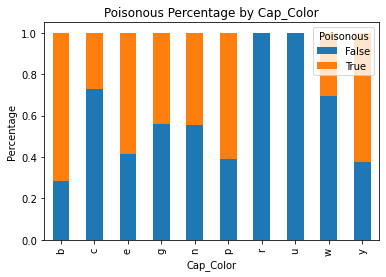

In [25]:
Poisonous_Cap_Color = pd.crosstab(mr_sub.Cap_Color, mr_sub.Poisonous.astype(bool))
Poisonous_Cap_Color.div(Poisonous_Cap_Color.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Poisonous Percentage by Cap_Color')
plt.xlabel('Cap_Color')
plt.ylabel('Percentage')

From this stacked bar chart, we can see that most mushrooms of different "Cap_color" are both non-toxic and poisonous, so "Cap_color" may not be helpful in predicting if a specific mushroom is edible or poisonous.

## Build Predictive Models

### Logistic Regression
Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [31]:
# create a subset of the data using ONLY the selected explanatory variables
X = mr_with_dummy.iloc[:, 1:23].values
X

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [33]:
# isolate the response indicator for the data
y = mr_with_dummy['Poisonous'].values
y

array([1, 0, 0, ..., 0, 1, 0])

In [34]:
# We're using the LogisticRegression() method for this model
model = LogisticRegression()

In [35]:
# fit the model: X contains our explanatory variables while 
# y contains the response variable
model.fit(X, y)

LogisticRegression()

In [36]:
# calculate the accuracy of the model relative to the data set
model.score(X, y)

0.9852289512555391

In [37]:
# what percentage were poisonous?
y.mean()

0.48202855736090594

Only 48% of the mushrooms were poisonous, which means that you could obtain 52% accuracy by always predicting "no". So we're doing better than the null error rate.

In [40]:
# examine the model coefficients for the explanatory variables
print(mr_with_dummy.columns[1:23])
model.coef_

Index(['Odor_a', 'Odor_c', 'Odor_f', 'Odor_l', 'Odor_m', 'Odor_n', 'Odor_p',
       'Odor_s', 'Odor_y', 'Cap_Color_b', 'Cap_Color_c', 'Cap_Color_e',
       'Cap_Color_g', 'Cap_Color_n', 'Cap_Color_p', 'Cap_Color_r',
       'Cap_Color_u', 'Cap_Color_w', 'Cap_Color_y', 'Ring_Number_n',
       'Ring_Number_o', 'Ring_Number_t'],
      dtype='object')


array([[-7.65408082,  3.09062178,  5.22473558, -7.65408082,  0.8970674 ,
        -5.11288765,  2.97558795,  4.11664516,  4.11664516,  1.45956701,
        -0.6680436 , -1.28937853, -1.82728567, -0.80586623,  1.32391142,
        -0.41250726, -0.41250726,  0.18664412,  2.44571974,  0.8970674 ,
        -0.93607332,  0.03925967]])

For "Odor", 'a', 'l', 'n' are more likely to be edible, others are more likely to be poisonous.

For "Cap_Color", 'c', 'e', 'g', 'n', 'r', 'u' are more likely to be edible, others are more likely to be poisonous.

For "Ring_Number", 'o' is more likely to be edible, others are more likely to be poisonous.

### Model Evaluation Using a Validation Set
So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [41]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [47]:
# predict class labels for the test set
predicted = model2.predict(X_test)
print( predicted)

[1 0 0 ... 1 1 1]


In [48]:
# generate class probabilities
probs = model2.predict_proba(X_test)
print(probs)

[[0.02020944 0.97979056]
 [0.99207017 0.00792983]
 [0.95663756 0.04336244]
 ...
 [0.00372753 0.99627247]
 [0.01107121 0.98892879]
 [0.01125358 0.98874642]]


As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

In [50]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.9864643150123051
0.9982088821644713


The accuracy is 98%, which is the same as we experienced when training and predicting on the same data.

In [52]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1272    0]
 [  33 1133]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1272
           1       1.00      0.97      0.99      1166

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



## Conclusion

Whether mushrooms are poisonous or not is indeed related to "Odor", "Cap_Color" and "Ring_Number".

For "Odor", 'a', 'l', 'n' are more likely to be edible, others are more likely to be poisonous.

For "Cap_Color", 'c', 'e', 'g', 'n', 'r', 'u' are more likely to be edible, others are more likely to be poisonous.

For "Ring_Number", 'o' is more likely to be edible, others are more likely to be poisonous.

For further analysis, I suggest analyzing the relationship between "Poisonous" and other attributes that we didn't analyze before to improve the accuracy of the prediction.